In [48]:
%load_ext autoreload
%autoreload 2
import pandas as pd

import numpy as np

from src.data_paths import *
from matplotlib import pyplot as plt
from tqdm import tqdm
from math import log

from sklearn.metrics import confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df_doi = pd.read_pickle(DOI_DF_PATH)
print("DOI DataFrame len: ", len(df_doi))
df_doi.head()

DOI DataFrame len:  40737


,fetched,title,abstract,year,month,day
doi,,,,,,
10.1021/jm9602571,True,"Cyclic HIV Protease Inhibitors: Synthesis, Co...",No abstract available,1996,1,1
10.1016/j.chembiol.2013.07.014,True,Substrate Envelope-Designed Potent HIV-1 Prote...,No abstract available,2013,9,<NA>
10.1021/jm9507183,True,"A Novel, Picomolar Inhibitor of Human Immunode...",No abstract available,1996,1,1
10.1126/science.2200122,True,"Design, Activity, and 2.8 Å Crystal Structure ...",<jats:p>\n A two-fold (\n ...,1990,8,3
10.1021/ja00082a004,True,Influence of stereochemistry on activity and b...,No abstract available,1994,2,<NA>


In [10]:
df_bindingdb = pd.read_pickle(BINDINGDB_CLEAN)
df_bindingdb.head()

,ki,ph,temp,ic50,ec50,kd,kon,koff,doi,target_name,...,chembl_id,drugbank_id,kegg_id,zinc_id,smiles,inchi_key,bindingdb_id,swissprot_target_chain_name,swissprot_target_chain_entry_name,swissprot_protein_id
0,0.24,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,<NA>,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,Gag-Pol polyprotein,POL_HV1BR,<NA>
1,0.25,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03948988,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,Gag-Pol polyprotein,POL_HV1BR,<NA>
2,0.41,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03826079,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,Gag-Pol polyprotein,POL_HV1BR,<NA>
3,0.8,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907367,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,Gag-Pol polyprotein,POL_HV1BR,<NA>
4,0.99,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907369,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,Gag-Pol polyprotein,POL_HV1BR,<NA>


In [63]:
df_bindingdb.columns

Index(['ki', 'ph', 'temp', 'ic50', 'ec50', 'kd', 'kon', 'koff', 'doi',
       'target_name', 'pubchem_cid', 'chebi_id', 'chembl_id', 'drugbank_id',
       'kegg_id', 'zinc_id', 'smiles', 'inchi_key', 'bindingdb_id',
       'swissprot_target_chain_name', 'swissprot_target_chain_entry_name',
       'swissprot_protein_id', 'target_name_nonmutant'],
      dtype='object')

In [11]:
df_doi.head()

,fetched,title,abstract,year,month,day
doi,,,,,,
10.1021/jm9602571,True,"Cyclic HIV Protease Inhibitors: Synthesis, Co...",No abstract available,1996,1,1
10.1016/j.chembiol.2013.07.014,True,Substrate Envelope-Designed Potent HIV-1 Prote...,No abstract available,2013,9,<NA>
10.1021/jm9507183,True,"A Novel, Picomolar Inhibitor of Human Immunode...",No abstract available,1996,1,1
10.1126/science.2200122,True,"Design, Activity, and 2.8 Å Crystal Structure ...",<jats:p>\n A two-fold (\n ...,1990,8,3
10.1021/ja00082a004,True,Influence of stereochemistry on activity and b...,No abstract available,1994,2,<NA>


Max year:  2013


Text(0.5, 0, 'Year of publication')

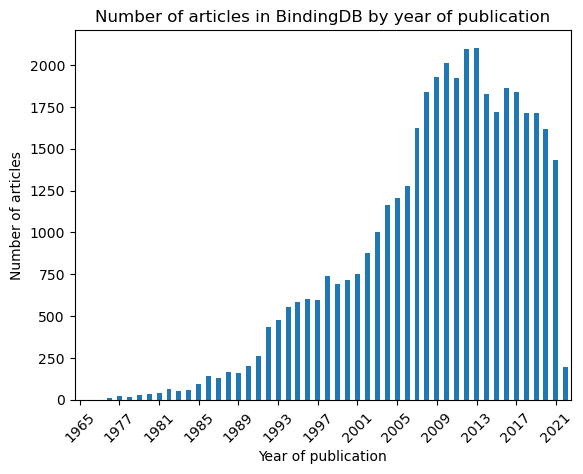

In [79]:

year_pubs = df_doi.dropna(subset=['year']).value_counts('year').sort_index()
print("Max year: ", year_pubs.index[year_pubs.argmax()])
year_pubs.plot(kind='bar') 
# Only display the tick for every four years
plt.xticks(np.arange(0, len(year_pubs), 4), year_pubs.index[::4], rotation=45)

plt.title('Number of articles in BindingDB by year of publication')
plt.ylabel('Number of articles')
plt.xlabel('Year of publication')

Text(0.5, 1.0, 'Number of articles in BindingDB by month of publication')

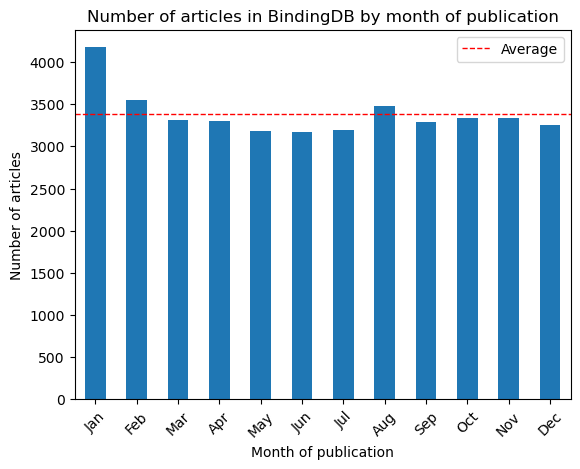

In [29]:
# Cut the protein name after the bracket

month_value_counts = df_doi.dropna(subset=['month']).value_counts('month')
month_value_counts.sort_index().plot(kind='bar') 
# show avg
avg = sum(month_value_counts)/12
plt.axhline(avg, color='r', linestyle='dashed', linewidth=1, label='Average')
plt.legend(['Average'])
plt.xticks(rotation=45)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Number of articles')
plt.xlabel('Month of publication')
plt.title('Number of articles in BindingDB by month of publication')

In [30]:
month_published = df_doi.dropna(subset=['month'])
# Bootstrap 95% confidence interval for the probability of january publication
n = 1000
january_proportion = []
for _ in tqdm(range(n)):
    sample = month_published.sample(frac=1, replace=True)
    january_proportion.append((sample['month'] == 1).mean())

print("95% CI for the probability of january publication: ", np.percentile(january_proportion, [2.5, 97.5]))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:07<00:00, 134.51it/s]

95% CI for the probability of january publication:  [0.10015715 0.10572955]


In [31]:

month_published = df_doi.dropna(subset=['month'])
# Bootstrap 95% confidence interval for the probability of january publication
n = 1000
january_proportion = []
for _ in tqdm(range(n)):
    sample = month_published.sample(frac=1, replace=True)
    january_proportion.append((sample['month'] == 8).mean())

print("95% CI for the probability of january publication: ", np.percentile(january_proportion, [2.5, 97.5]))

100%|██████████| 1000/1000 [00:08<00:00, 121.92it/s]

95% CI for the probability of january publication:  [0.08275341 0.0884503 ]


In [ ]:
1/12

0.08333333333333333

**We will rely on other columns (like Target Name) and further metadata to get the cancers and mutants more accurately**

In [32]:

def get_target_name_nonmutant(x):
    return x.split('[')[0]
df_bindingdb['target_name_nonmutant'] = df_bindingdb['target_name'].apply(get_target_name_nonmutant)

df_bindingdb['target_name'].nunique(), df_bindingdb['target_name_nonmutant'].nunique()

(6734, 5808)

How many articles per protein?

Text(0.5, 0, 'Number of articles')

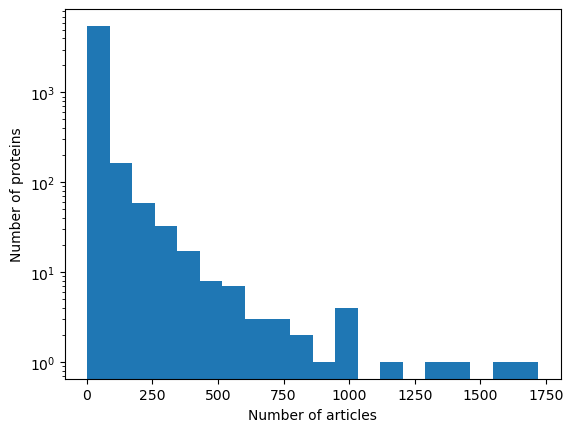

In [69]:
unique_prots = df_bindingdb['target_name_nonmutant'].unique()

protein_to_doi = {prot: set() for prot in unique_prots}
for _, row in df_bindingdb.iterrows():
    protein = row['target_name_nonmutant']
    doi = row['doi']
    protein_to_doi[protein].add(doi)

count = {prot: len(dois) for prot, dois in protein_to_doi.items()}
# Make the histogram (log y)
hist = plt.hist(count.values(), bins=20)
plt.yscale('log')
plt.ylabel('Number of proteins')
plt.xlabel('Number of articles')






So we that at some of the cancer-related protiens were studied hundreds of times!

Calculating best minimal value for power law fit
/home/miki/epfl/ada_project/.conda/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


xmin (start of power-law fit): 264.0
alpha (power-law exponent): 2.872292274419662


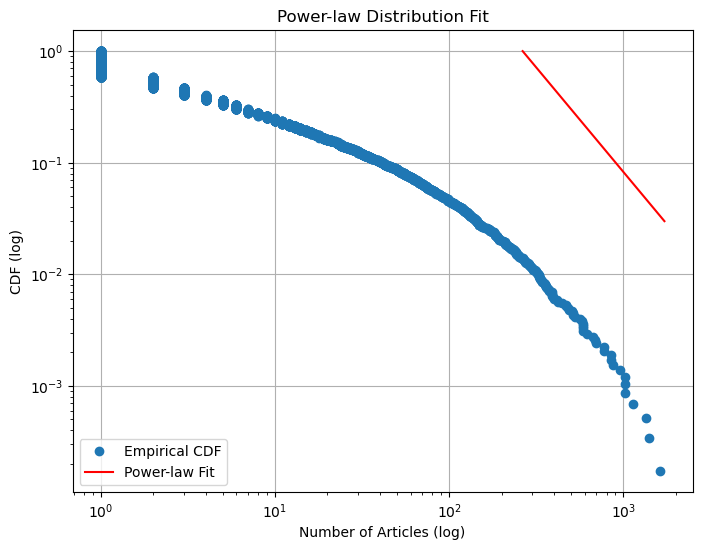

In [37]:
data = [i for i in sorted(count.values(), reverse=True)]
import powerlaw


# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Extract the x_min and alpha (power-law parameters)
xmin = fit.xmin
alpha = fit.alpha
print(f"xmin (start of power-law fit): {xmin}")
print(f"alpha (power-law exponent): {alpha}")

# Generate CDF for visualization
sorted_data = np.sort(data)
cdf = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the empirical CDF
plt.figure(figsize=(8, 6))
plt.loglog(sorted_data, cdf, marker='o', linestyle='none', label='Empirical CDF')

# Plot the theoretical power-law fit
powerlaw_line = (sorted_data[sorted_data >= xmin] / xmin) ** (1 - alpha)
plt.loglog(sorted_data[sorted_data >= xmin], powerlaw_line, linestyle='-', color='red', label='Power-law Fit')

# Add labels and legend
plt.xlabel('Number of Articles (log)')
plt.ylabel('CDF (log)')
plt.title('Power-law Distribution Fit')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
MIN_ARTICLES = 500
well_studied_proteins = {prot: protein_to_doi[prot] for prot, count in count.items() if count >= MIN_ARTICLES}

well_studied_proteins_cancer_relationship = {
    "Cytochrome P450 3A4": True,
    "Proto-oncogene tyrosine-protein kinase Src": True,
    "Epidermal growth factor receptor": True,
    "Vascular endothelial growth factor receptor 2": True,
    "D(2) dopamine receptor": False,
    "5-hydroxytryptamine receptor 1A": False,
    "5-hydroxytryptamine receptor 2A": False,
    "Acetylcholinesterase": False,
    "Cholinesterase": False,
    "Carbonic anhydrase 1": False,
    "Carbonic anhydrase 2": False,
    "Sodium-dependent serotonin transporter": False,
    "Prothrombin": False,
    "Adenosine receptor A2a": True,
    "Histone deacetylase 1": False,
    "Delta-type opioid receptor": False,
    "Mu-type opioid receptor": False,
    "Kappa-type opioid receptor": False,
    "Cytochrome P450 2C9": True,
    "Adenosine receptor A1": False,
    "Potassium voltage-gated channel subfamily H member 2": False,
    "Cannabinoid receptor 1": False,
    "Cytochrome P450 1A2": True,
    "Cytochrome P450 2C19": True,
    "Cytochrome P450 2D6": True,
    "Sodium-dependent dopamine transporter": False,
    "Prostaglandin G/H synthase 1": True,
    "Prostaglandin G/H synthase 2": True
}

print(sum(cancer_related_proteins.values())/len(cancer_related_proteins))

cancer_well_studied_proteins = {key: value for key, value in well_studied_proteins.items() if well_studied_proteins_cancer_relationship[key]}

print(f"Number of well-studied proteins: {len(well_studied_proteins)}")
for ws_protein in well_studied_proteins:
    print(f"{ws_protein}: {count[ws_protein]} articles")

print("Fraction")



0.39285714285714285
Number of well-studied proteins: 28
Cytochrome P450 3A4: 1613 articles
Epidermal growth factor receptor: 877 articles
Proto-oncogene tyrosine-protein kinase Src: 512 articles
Vascular endothelial growth factor receptor 2: 772 articles
D(2) dopamine receptor: 1136 articles
5-hydroxytryptamine receptor 1A: 844 articles
5-hydroxytryptamine receptor 2A: 696 articles
Acetylcholinesterase: 1025 articles
Cholinesterase: 586 articles
Carbonic anhydrase 1: 589 articles
Carbonic anhydrase 2: 687 articles
Sodium-dependent serotonin transporter: 666 articles
Prothrombin: 579 articles
Adenosine receptor A2a: 507 articles
Histone deacetylase 1: 525 articles
Delta-type opioid receptor: 850 articles
Mu-type opioid receptor: 1026 articles
Kappa-type opioid receptor: 774 articles
Cytochrome P450 2C9: 1341 articles
Adenosine receptor A1: 616 articles
Potassium voltage-gated channel subfamily H member 2: 1720 articles
Cannabinoid receptor 1: 516 articles
Cytochrome P450 1A2: 1020 artic

We see those are indeed distinct (not, for example, mutants of one another). How do the timelines look like?

Cytochrome P450 3A4 NA months: 0.24%
Epidermal growth factor receptor NA months: 0.00%
Proto-oncogene tyrosine-protein kinase Src NA months: 0.00%
Vascular endothelial growth factor receptor 2 NA months: 0.00%
Adenosine receptor A2a NA months: 0.00%
Cytochrome P450 2C9 NA months: 0.00%
Cytochrome P450 1A2 NA months: 0.00%
Cytochrome P450 2C19 NA months: 0.00%
Cytochrome P450 2D6 NA months: 0.00%
Prostaglandin G/H synthase 1 NA months: 0.00%
Prostaglandin G/H synthase 2 NA months: 0.00%


/tmp/ipykernel_392386/3270211856.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_392386/3270211856.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_392386/3270211856.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_3

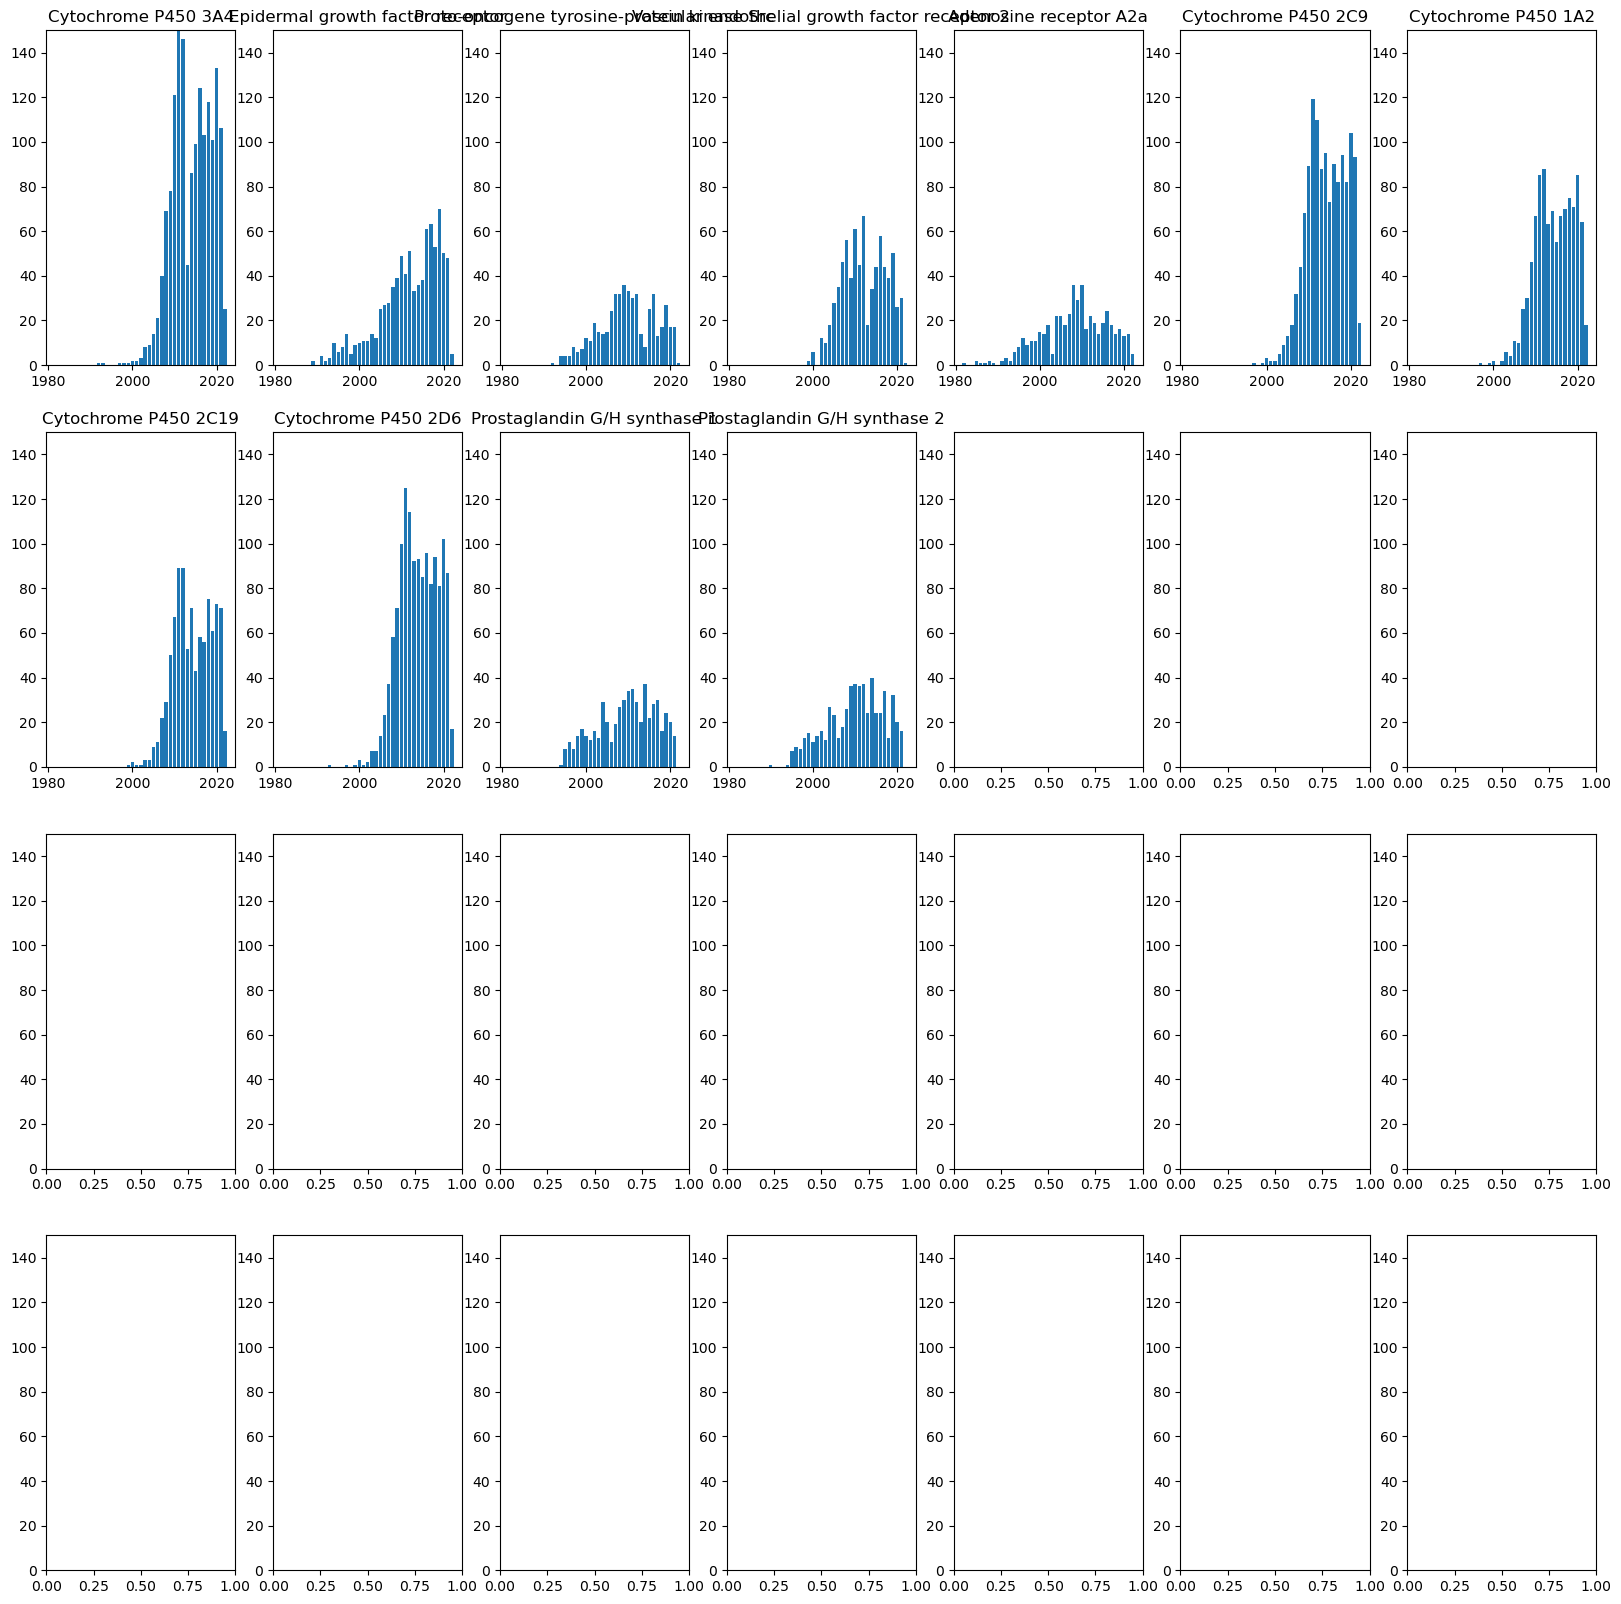

In [ ]:
# Crate subplots
fig, axs = plt.subplots(4, 7, figsize=(20, 20))

well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)

max_y = 0
# Flatten the axs array
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)
 
    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)

    

In [57]:
from openai import OpenAI
from tqdm import tqdm
client = OpenAI()


print()

def is_cancer_realted(protein):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a pharmacological expert. You job is to review the following protein and answer the following quetion: Is research into binding affinity of this protein more likely to be cancer related, or not? Answer with 0 if it is not cancer related, and 1 if it is cancer related. Add no explanation, your answer should just be the digit."},
            {"role": "user", "content": protein}
            
        ],
        temperature=0
    )
    return True if completion.choices[0].message.content == "1" else False


unique_prots = df_bindingdb['target_name'].unique()
print(len(unique_prots))


chatgpt_well_studied_proteins = {k: is_cancer_realted(k) for k in well_studied_proteins.keys()}





6734


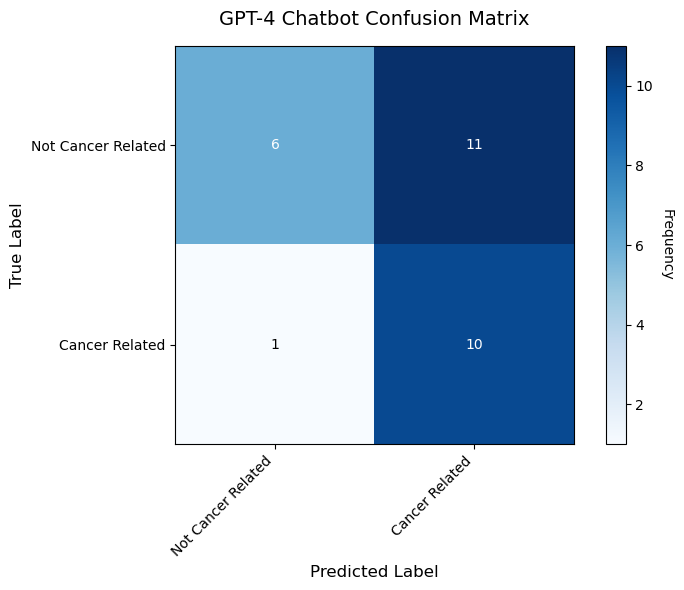

Precision: 0.48
Recall: 0.91
F1 Score: 0.62
Accuracy: 0.57


In [61]:
true_positives = sum([1 for k, v in chatgpt_well_studied_proteins.items() if v and well_studied_proteins_cancer_relationship[k]])
false_positives = sum([1 for k, v in chatgpt_well_studied_proteins.items() if v and not well_studied_proteins_cancer_relationship[k]])
true_negatives = sum([1 for k, v in chatgpt_well_studied_proteins.items() if not v and not well_studied_proteins_cancer_relationship[k]])
false_negatives = sum([1 for k, v in chatgpt_well_studied_proteins.items() if not v and well_studied_proteins_cancer_relationship[k]])

# Show confusion matrix

conf_matrix = confusion_matrix([well_studied_proteins_cancer_relationship[k] for k in chatgpt_well_studied_proteins.keys()], list(chatgpt_well_studied_proteins.values()))


plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Add colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Frequency', rotation=270, labelpad=15)
classes = ['Not Cancer Related', 'Cancer Related']
plt.xticks(np.arange(len(classes)), classes, rotation=45, ha='right', fontsize=10)
plt.yticks(np.arange(len(classes)), classes, fontsize=10)

# Add axis labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('GPT-4 Chatbot Confusion Matrix', fontsize=14, pad=15)

# Add text annotations for each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j]}', 
                 ha='center', va='center', 
                 color='black' if conf_matrix[i, j] < conf_matrix.max() / 2 else 'white', 
                 fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate precision, recall, and F1 score
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * precision * recall / (precision + recall)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Cytochrome P450 3A4 NA months: 0.24%
Epidermal growth factor receptor NA months: 0.00%
Proto-oncogene tyrosine-protein kinase Src NA months: 0.00%
Vascular endothelial growth factor receptor 2 NA months: 0.00%
Adenosine receptor A2a NA months: 0.00%
Cytochrome P450 2C9 NA months: 0.00%
Cytochrome P450 1A2 NA months: 0.00%
Cytochrome P450 2C19 NA months: 0.00%
Cytochrome P450 2D6 NA months: 0.00%
Prostaglandin G/H synthase 1 NA months: 0.00%
Prostaglandin G/H synthase 2 NA months: 0.00%


/tmp/ipykernel_392386/4141416843.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_392386/4141416843.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_392386/4141416843.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_3

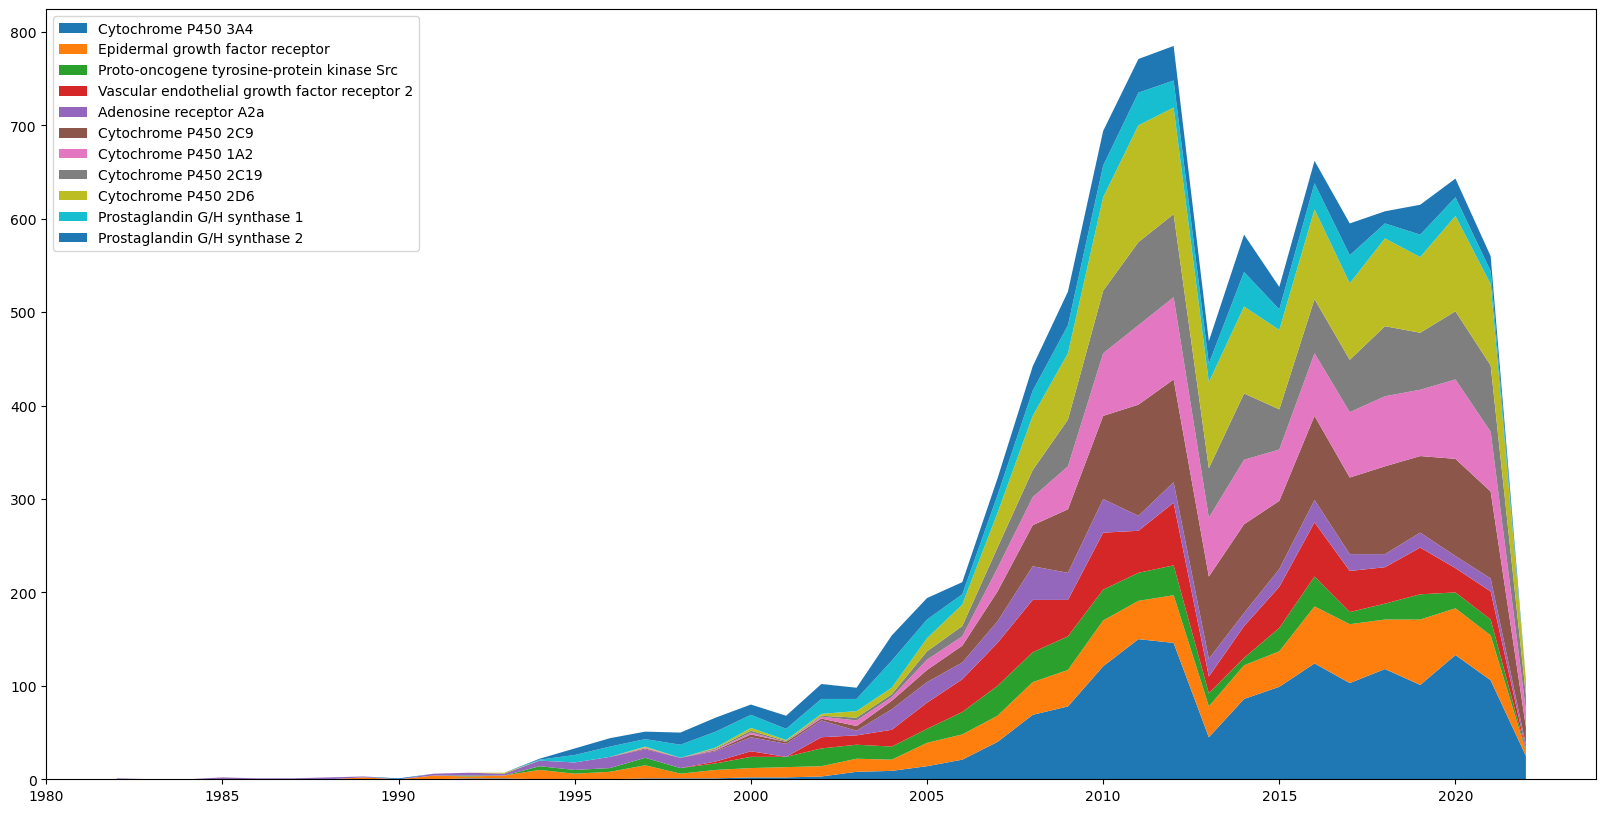

In [ ]:
# Crate subplots


well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)
plt.figure(figsize=(20, 10))
max_y = 0
# Flatten the axs array
all_counts_array = []
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    all_counts_array.append(counts_all)

    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)

    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)



plt.stackplot(years, all_counts_array, labels=well_studied_proteins.keys())
plt.legend()
    

This dose not consider the number of Ligands in a single article (the number of measurements).

## Let's look at the ligands, which bind to the most reserached cancer-related proteins

In [66]:

df_realted_to_cancer_protein = df_bindingdb[df_bindingdb['target_name_nonmutant'].isin(cancer_well_studied_proteins.keys())]
unique_ligands = df_realted_to_cancer_protein['smiles'].unique()
print(f"Number of unique ligands: {len(ligands)}")

Number of unique ligands: 54275


Text(0.5, 0, 'Number of articles')

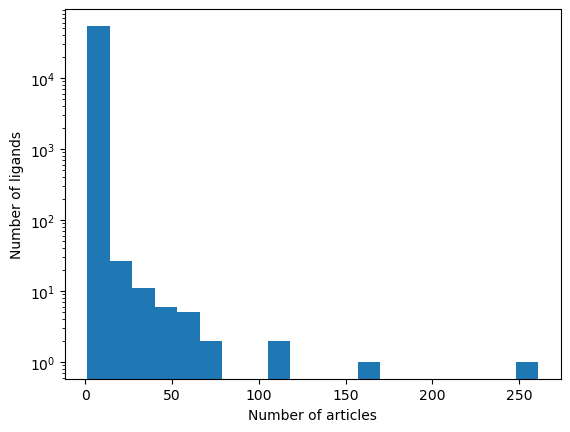

In [70]:

ligand_to_doi = {lig: set() for lig in unique_ligands}
for _, row in df_realted_to_cancer_protein.iterrows():
    ligand = row['smiles']
    doi = row['doi']
    ligand_to_doi[ligand].add(doi)

count = {ligand: len(dois) for ligand, dois in ligand_to_doi.items()}
# Make the histogram (log y)
hist = plt.hist(count.values(), bins=20)
plt.yscale('log')
plt.ylabel('Number of ligands')
plt.xlabel('Number of articles')

In [ ]:
wsp = list(cancer_related_proteins.keys())[0]
wsp


KeyError: 'wsp'